# 第2回資料

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

## 様々な分布のデータ
- 様々なデータでヒストグラムを作成し、データの「形」を見る。
- ある分布に従うランダムなデータを作成するためには、numpy.randomモジュールに含まれる関数を使う。

In [2]:
from numpy import random as rd

In [3]:
d01 = rd.normal(0.0, 1.0, 10000)        # 平均値:0.0 標準偏差:1.0 の正規分布（標準正規分布）に従う乱数を10,000個作成する。
d02 = rd.normal(0.0, 5.0, 10000)        # 平均値:0.0 標準偏差:5.0 の正規分布に従う乱数を10,000個作成する。
d03 = rd.normal(5.0, 1.0, 10000)        # 平均値:5.0 標準偏差:1.0 の正規分布に従う乱数を10,000個作成する。
d04 = rd.rand(10000)                    # 範囲[0, 1.0)の一様分布乱数を10,000個作成する。
d05 = 5.0 * rd.rand(10000) + 3.0       # 範囲[3.0, 8.0)の一様分布乱数を10,000個作成する。
d06 = rd.lognormal(0.05, 0.30, 10000)   # 平均値:0.05 標準偏差:0.30 の対数正規分布に従う乱数を10,000個作成する。
d07 = -rd.lognormal(0.05, 0.30, 10000)  # 平均値: -0.05 標準偏差:0.30 の対数正規分布に従う乱数を10,000個作成する。
d08 = np.hstack((rd.normal(-10.0, 3.0, 5000),rd.normal(7.0, 5.0, 5000)))  
# 平均値: -10.0 標準偏差: 3.0の正規分布に従う乱数5,000個と平均値: 7.0 標準偏差:5.0 の正規分布に従う乱数5,000個を合成したもの。
d09 = np.random.standard_cauchy(10000)  # コーシー分布に従う乱数を10,000個作成する。
d09 = d09[(d09>-25) & (d09<25)]        # コーシー分布は範囲が広いため、(-25, 25)の範囲のデータのみ抽出する。

In [6]:
# データの数（行数・列数）を調べる。
d01.shape

(10000,)

In [17]:
# pandasのデータフレームに入れて要約する。
# pd.DataFrame(d01, columns=['d01']).describe() のように1行に書いても同じ結果が得られる。
df = pd.DataFrame(d01, columns=['d01'])
df.describe()

,d01
count,10000.000000
mean,0.014822
std,0.994934
min,-3.942372
25%,-0.653528
50%,0.009425
75%,0.682849
max,3.648202


## ヒストグラム
- グラフを書くにはmatplotlibかseabornを使う。
- とりあえずきれいなグラフを書くにはseabornが便利。
- 細かい部分まで作り込む場合はmatplotlibを使う。
- Jupyter Notebookでグラフを表示するには、「%matplotlib inline」を書く必要がある。

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')            # グリッドを表示する設定

### 警告の非表示
- 将来のバージョンアップに向けて警告が出る場合がある。
- 警告がでるものの、今回の実行には直接影響はない。
- 以下の命令を入れることで非表示にできる。

In [41]:
import warnings
warnings.filterwarnings('ignore')

### sns.distplot
- 標準の設定では、確率密度関数が描かれる。
- 縦軸は割合表示となる。
- kdeとnorm_histの設定を変えることで調整可能。

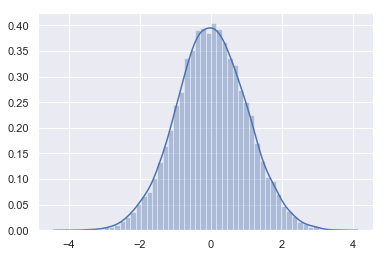

In [42]:
sns.distplot(d01)
plt.show()

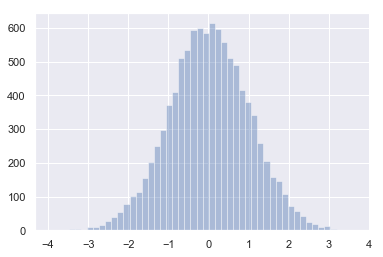

In [43]:
sns.distplot(d01, kde=False, norm_hist=False)
plt.show()

### 2種類以上のデータを同時に表示
- 2つの命令を書けば2種類のグラフが描かれる。
- 見やすさなどは色の設定などが必要となる。

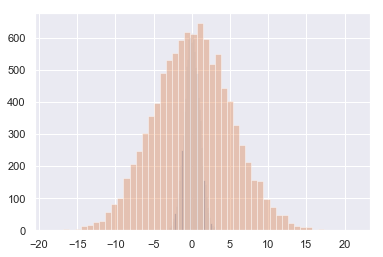

In [44]:
sns.distplot(d01, kde=False, norm_hist=False)
sns.distplot(d02, kde=False, norm_hist=False)
plt.show()

## 箱ひげ図
### sns.boxplot

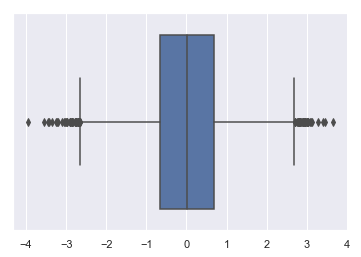

In [40]:
sns.boxplot(d01)
plt.show()